<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Exercise%20Solutions/%F0%9F%9B%A0%20%2001_Neural_network_regression_in_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 01_Neural_network_regression_in_Tensorflow

- Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
- Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
- Try and improve the results we got on the insurance dataset, some things you might want to try include:
    - Building a larger model (how does one with 4 dense layers go?).
    - Increasing the number of units in each layer.
    - Lookup the documentation of Adam and find out what the first parameter is,what happens if you increase it by 10x?
    - What happens if you train for longer (say 300 epochs instead of 200)?
- Import the Boston pricing dataset from TensorFlow `tf.keras.datasets` and model it.

In [ ]:
import tensorflow as tf 
import tensorflow_datasets as tfds 

## 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.




In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression 

X , y  = make_regression(n_samples = 200 , 
                               n_features = 10 , 
                               n_targets = 1)

X.shape , y.shape

((200, 10), (200,))

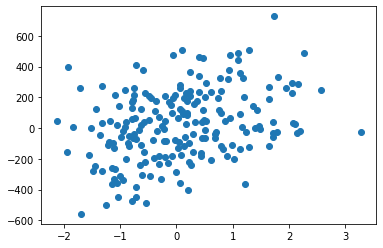

In [ ]:
# Let's visualize the dataset 

plt.scatter(X[:, 0] , y)

In [ ]:
# Modelling our dummy data 

# Set the random seed 
tf.random.set_seed(42)

# Create a model using the Sequential API 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fitting the model 
model.fit(X , y , epochs = 10)

Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 183.8536 - mae: 183.8536
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 201.4009 - mae: 201.4009
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 184.0091 - mae: 184.0091
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 182.4611 - mae: 182.4611
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 175.1821 - mae: 175.1821
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 189.3813 - mae: 189.3813
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 171.6145 - mae: 171.6145
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 184.6617 - mae: 184.6617
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 181.2377 - mae: 181.2377
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 181.5543 - mae: 181.5543


## 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [ ]:
# Building the model again with 4 Dense layers 
tf.random.set_seed(42)

# Build the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10) , 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
]) 

# Compile the model
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fit the model 
model.fit(X , y , epochs= 10)

Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 183.7080 - mae: 183.7080
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 201.3014 - mae: 201.3014
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 183.7484 - mae: 183.7484
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 182.0440 - mae: 182.0440
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 174.8146 - mae: 174.8146
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 188.7902 - mae: 188.7902
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 171.0878 - mae: 171.0878
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 184.0392 - mae: 184.0392
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 180.4885 - mae: 180.4885
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 180.5516 - mae: 180.5516


Hmm..Seems the model isn't improving maybe running for more epochs would do the magic. But let's split this into train and test set to help our model to generalize well. 

In [ ]:
# Splitting the data into train and test splits 
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 )

# Checking the shapes of our splitted data 
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((160, 10), (160,), (40, 10), (40,))

In [ ]:
# Let's build the model from scratch 
tf.random.set_seed(42)

# Model 1 with one layer and fewer units 
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model 
model_1.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# Fit the model only our training data 
model.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 178.6407 - mae: 178.6407
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 178.4565 - mae: 178.4565
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 178.2312 - mae: 178.2312
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 177.9810 - mae: 177.9810
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 177.6878 - mae: 177.6878
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 177.3393 - mae: 177.3393
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 176.9552 - mae: 176.9552
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 176.4884 - mae: 176.4884
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 175.9301 - mae: 175.9301
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 175.3399 - mae: 175.3399
Epoch 11/100
5/5 [=====================

In [ ]:
# Evaluating our model on the test data (unseen data)
model_1.evaluate(X_test , y_test)

2/2 [==============================] - 0s 6ms/step - loss: 202.4472 - mae: 202.4472


[200.08413696289062, 200.08413696289062]

In [ ]:
# Getting the predictions of our model 
y_preds_1 = model_1.predict(X_test)
y_preds_1

array([[-0.95550996],
       [ 0.70432204],
       [-1.285492  ],
       [-2.180891  ],
       [ 1.1370178 ],
       [-1.1014683 ],
       [-1.2271867 ],
       [-1.4809712 ],
       [-0.6412216 ],
       [-0.5445875 ],
       [ 0.28941685],
       [-1.3851448 ],
       [ 1.008815  ],
       [-1.393259  ],
       [-1.6048645 ],
       [ 0.03306745],
       [-0.5243251 ],
       [ 1.904033  ],
       [-1.5452797 ],
       [-2.0084453 ],
       [ 0.19344163],
       [-1.4267942 ],
       [ 1.0390828 ],
       [ 0.2630057 ],
       [ 0.8490603 ],
       [ 1.0701791 ],
       [-1.6850458 ],
       [-0.46321878],
       [-3.0962188 ],
       [ 0.41170976],
       [-0.52239954],
       [-0.7228887 ],
       [-0.6879473 ],
       [-0.5413897 ],
       [ 0.11972245],
       [-1.2453417 ],
       [ 0.1523251 ],
       [ 2.3956163 ],
       [-0.04025365],
       [-1.6727933 ]], dtype=float32)

In [ ]:
def plot_predictions(train_data,
                     train_labels, 
                     test_data,
                     test_labels, 
                     predictions):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

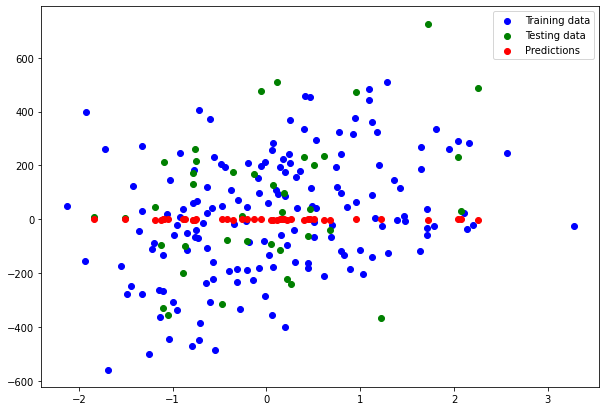

In [ ]:
# Plotting our predictions with our target 
plot_predictions(X_train[:,0] , y_train ,  
                 X_test[:,0] , y_test , y_preds_1)

Great! Our model is trying to predict the points but it's not doing a great job with it. 

Let's try couple of experiments and see how it goes.


In [ ]:
# Building a model with 2 layers and fewer units
tf.random.set_seed(42)

# Build the model 
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10) ,
  tf.keras.layers.Dense(10), 
])

# Compile the model 
model_2.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# Fit the model 
model_2.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 181.0060 - mae: 181.0060
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 177.9663 - mae: 177.9663
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 172.4464 - mae: 172.4464
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 186.0259 - mae: 186.0259
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 175.5156 - mae: 175.5156
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 169.7794 - mae: 169.7794
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 189.2825 - mae: 189.2825
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 185.0668 - mae: 185.0668
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 168.7978 - mae: 168.7978
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 171.6197 - mae: 171.6197
Epoch 11/100
5/5 [=====================

In [ ]:
# Building our model with 3 layers and with more hidden units 

tf.random.set_seed(42)

# Creating the model 
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(50), 
  tf.keras.layers.Dense(1) # Should be always one 
])

# Compile the model 
model_3.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# Fit the model 
model_3.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 180.7138 - mae: 180.7138
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 177.2084 - mae: 177.2084
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 171.1185 - mae: 171.1185
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 184.0426 - mae: 184.0426
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 172.9137 - mae: 172.9137
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 166.4625 - mae: 166.4625
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 184.7496 - mae: 184.7496
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 179.4012 - mae: 179.4012
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 162.1780 - mae: 162.1780
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 163.0190 - mae: 163.0190
Epoch 11/100
5/5 [=====================

Woooo! Look at that, but we shouldn't be excited lets evaluate on the test data. 

In [ ]:
model_3.evaluate(X_test , y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.6690 - mae: 0.6690


[0.6690224409103394, 0.6690224409103394]

Awesome! This is what we want error should be loss. Let's plot our predictions with targets!

In [ ]:
# Making predictions 
y_preds_3 = model_3.predict(X_test)
y_preds_3.shape

(40, 1)

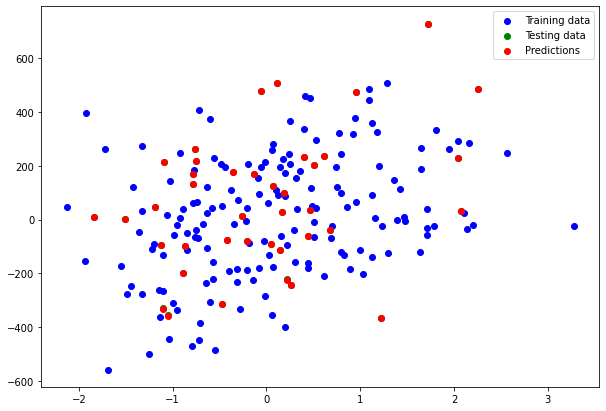

In [ ]:
plot_predictions(X_train[: , 0] , y_train , 
                 X_test[: , 0] , y_test , 
                 y_preds_3)

Look at that! Our model has predicted every test data correctly. You can't spot a green dot (test data) it's because our predictions (red dot) overlapped. 

Our model is doing a perfect job!

## Try and improve the results we got on the insurance dataset, some things you might want to try include:
- Building a larger model (how does one with 4 dense layers go?).
- Increasing the number of units in each layer.
- Lookup the documentation of Adam and find out what the first parameter is,what happens if you increase it by 10x?
- What happens if you train for longer (say 300 epochs instead of 200)?

### Building a larger model (how does one with 4 dense layers go?)

In [ ]:
# Let's download the data 
import pandas as pd 
import numpy as np 

data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

data.shape

(1338, 7)

Our insurance data has 1338 rows and 7 columns

In [ ]:
# Looking into the data 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We have some categorical variables, let's convert those columns into numerial used pandas.

In [ ]:
# Turn categorical into numbers 
data_one_hot = pd.get_dummies(data)
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Splitting into X and Y 

X = data_one_hot.drop('charges' , axis = 1)
y = data_one_hot['charges']

X.shape , y.shape

((1338, 11), (1338,))

In [ ]:
# Creating train and test split 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Checking the shapes
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [ ]:
# Building the model with 4 dense layers and more units

tf.random.set_seed(42)

# Create the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(300) , 
  tf.keras.layers.Dense(200), 
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50) ,
  tf.keras.layers.Dense(1)
])


# Compiling the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fit the model 
model.fit(X_train , y_train , epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 12240.1551 - mae: 12240.1551
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7313.2228 - mae: 7313.2228
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 6693.0326 - mae: 6693.0326
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7058.5107 - mae: 7058.5107
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 6780.9089 - mae: 6780.9089
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 6644.6328 - mae: 6644.6328
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 6453.0210 - mae: 6453.0210
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 6689.9115 - mae: 6689.9115
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 6504.3999 - mae: 6504.3999
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 6444.9807 - mae: 6444.98

### Lookup the documentation of Adam and find out what the first parameter is,what happens if you increase it by 10x?

And running for 400 epochs

In [ ]:
# Let's tweak the Adam Optimizer's learning rate 

tf.random.set_seed(42)

# Create the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100) , 
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])


# Compiling the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001*10 ) , 
              metrics = ['mae'])

# Fit the model 
history = model.fit(X_train , y_train , epochs = 400)

Epoch 1/400
34/34 [==============================] - 1s 2ms/step - loss: 10052.8375 - mae: 10052.8375
Epoch 2/400
34/34 [==============================] - 0s 3ms/step - loss: 6790.7139 - mae: 6790.7139
Epoch 3/400
34/34 [==============================] - 0s 2ms/step - loss: 5798.6140 - mae: 5798.6140
Epoch 4/400
34/34 [==============================] - 0s 2ms/step - loss: 5239.7617 - mae: 5239.7617
Epoch 5/400
34/34 [==============================] - 0s 2ms/step - loss: 4245.1057 - mae: 4245.1057
Epoch 6/400
34/34 [==============================] - 0s 3ms/step - loss: 3907.5740 - mae: 3907.5740
Epoch 7/400
34/34 [==============================] - 0s 2ms/step - loss: 3859.1372 - mae: 3859.1372
Epoch 8/400
34/34 [==============================] - 0s 2ms/step - loss: 4074.5092 - mae: 4074.5092
Epoch 9/400
34/34 [==============================] - 0s 3ms/step - loss: 4408.9693 - mae: 4408.9693
Epoch 10/400
34/34 [==============================] - 0s 3ms/step - loss: 3919.0808 - mae: 3919.08

In [ ]:
# Evaluate on test data 
model.evaluate(X_test , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3268.9297 - mae: 3268.9297


[3268.9296875, 3268.9296875]

Text(0.5, 0, 'Epochs')

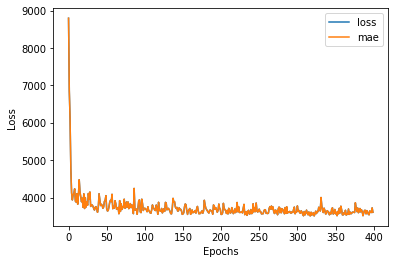

In [ ]:
# Let's plot the loss curve Vs Epochs 
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

Seems even increasing the learning rate and the number of epochs the model isn't performing an greater level. 

## Import the Boston pricing dataset from TensorFlow `tf.keras.datasets` and model it.

In [ ]:
# Getting the boston datasets from tensorflow datasets 

(X_train , y_train) , (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing_npz' , 
                                                                           test_split = 0.2 , seed = 42)

In [ ]:
# Checkin the shape of our data 
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((404, 13), (102, 13), (404,), (102,))

This datasets is numpy array format and it's normalized. 

In [ ]:
# Let's build a model 

tf.random.set_seed(42)

# Building a model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(200), 
  tf.keras.layers.Dense(200), 
  tf.keras.layers.Dense(150),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])


# Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fit the model 
history = model.fit(X_train , y_train , epochs  = 300 )

Epoch 1/300
13/13 [==============================] - 1s 3ms/step - loss: 129.3539 - mae: 129.3539
Epoch 2/300
13/13 [==============================] - 0s 3ms/step - loss: 20.6014 - mae: 20.6014
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 8.3834 - mae: 8.3834
Epoch 4/300
13/13 [==============================] - 0s 3ms/step - loss: 6.9895 - mae: 6.9895
Epoch 5/300
13/13 [==============================] - 0s 3ms/step - loss: 7.0010 - mae: 7.0010
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 6.0367 - mae: 6.0367
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 6.8780 - mae: 6.8780
Epoch 8/300
13/13 [==============================] - 0s 3ms/step - loss: 6.7407 - mae: 6.7407
Epoch 9/300
13/13 [==============================] - 0s 3ms/step - loss: 7.9784 - mae: 7.9784
Epoch 10/300
13/13 [==============================] - 0s 3ms/step - loss: 7.8341 - mae: 7.8341
Epoch 11/300
13/13 [==============================] -

In [ ]:
# Let's evaluate on the test data 
model.evaluate(X_test , y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.7630 - mae: 3.7630


[3.763040542602539, 3.763040542602539]

Text(0.5, 0, 'epochs')

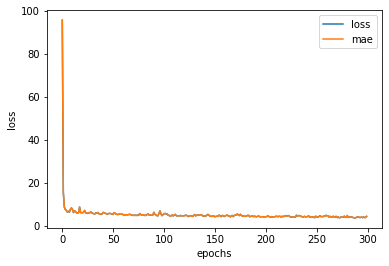

In [ ]:
# Plotting the loss Vs Epoch 
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Alright we're done solving Exercise of the modeule Neural Network Regression with TensorFlow. 